# Lead Scoring Assignment - Khanh Ilan Anubha
## There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

# Step 1: importing data

In [1001]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [1002]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [1003]:
df = pd.read_csv("Leads.csv")

# Step 2: inspecting the dataframe

In [1004]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1005]:
df.shape

(9240, 37)

In [1006]:
# let's look at the statistical aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1007]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [1008]:
# List of binary variables to convert
binary_vars = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article',
               'X Education Forums', 'Newspaper', 'Digital Advertisement', 
               'Through Recommendations', 'Receive More Updates About Our Courses',
               'Update me on Supply Chain Content', 'Get updates on DM Content',
               'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

# Conversion from 'Yes'/'No' to numeric 1/0
df[binary_vars] = df[binary_vars].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# Check the conversion results
df[binary_vars].head()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [1009]:
# List of categorical variables for one-hot encoding with multiple levels
multi_level_vars = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
                    'How did you hear about X Education', 'What is your current occupation',
                    'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
                    'Lead Profile', 'City', 'Asymmetrique Activity Index', 
                    'Asymmetrique Profile Index', 'Last Notable Activity']

# Creating dummy variables and dropping the first category to avoid multicollinearity
dummy_df = pd.get_dummies(df[multi_level_vars], drop_first=True)

# Adding dummy variables back into the main dataframe
df = pd.concat([df, dummy_df], axis=1)

# Dropping original categorical columns after encoding
df.drop(columns=multi_level_vars, inplace=True)

# Inspecting the transformed dataframe
df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,False,False,True,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,False,False,True,False,False,False,False,False,False,False


#### Dropping the repeated variables

In [1010]:
# Columns to drop (only if they still exist)
cols_to_drop = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
                'How did you hear about X Education', 'What is your current occupation',
                'What matters most to you in choosing this course', 'Tags', 'Lead Quality',
                'Lead Profile', 'City', 'Asymmetrique Activity Index',
                'Asymmetrique Profile Index', 'Last Notable Activity']

# Drop columns only if they are still present in df
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]

# Now drop safely
df.drop(columns=existing_cols_to_drop, inplace=True)

# Check resulting shape
df.shape

(9240, 192)

In [1011]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 192 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: bool(170), float64(4), int64(17), object(1)
memory usage: 3.0+ MB


In [1012]:
df['TotalVisits'] = pd.to_numeric(df['TotalVisits'], errors='coerce')
df['Total Time Spent on Website'] = pd.to_numeric(df['Total Time Spent on Website'], errors='coerce')
df['Page Views Per Visit'] = pd.to_numeric(df['Page Views Per Visit'], errors='coerce')

In [1013]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 192 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: bool(170), float64(4), int64(17), object(1)
memory usage: 3.0+ MB


#### Checking for Outliers

In [1014]:
# Checking outliers carefully in recommended numeric variables
numeric_vars = ['TotalVisits', 
                'Total Time Spent on Website', 
                'Page Views Per Visit',
                'Asymmetrique Activity Score', 
                'Asymmetrique Profile Score']

# Descriptive statistics at specific percentiles for identifying outliers
df[numeric_vars].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,3.445238,487.698268,2.362820,14.306252,16.344883
std,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,7.000000,11.000000
25%,1.000000,12.000000,1.000000,14.000000,15.000000
50%,3.000000,248.000000,2.000000,14.000000,16.000000
75%,5.000000,936.000000,3.000000,15.000000,18.000000
90%,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,17.000000,1840.610000,9.000000,17.000000,20.000000


- TotalVisits (99th percentile is 17 but max is 251)
- Page Views Per Visit (99th percentile is 9, but max is 55)

These variables have a significant difference between the 99th percentile and the maximum value, indicating strong outliers.

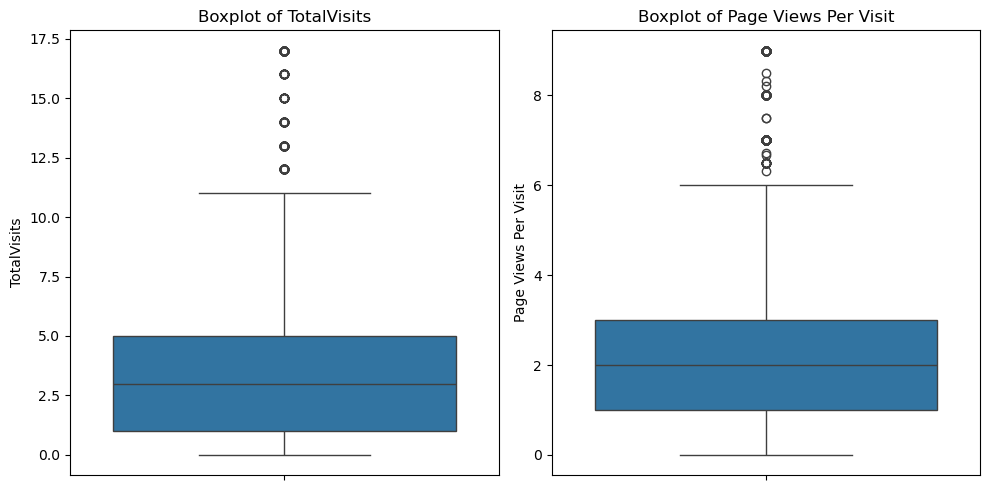

In [1015]:
# Defining variables with outliers to cap
outlier_vars = ['TotalVisits', 'Page Views Per Visit']

# Cap the values at the 99th percentile to handle outliers
for var in outlier_vars:
    upper_limit = df[var].quantile(0.99)
    df[var] = np.where(df[var] > upper_limit, upper_limit, df[var])

# Confirming outliers have been handled
df[outlier_vars].describe(percentiles=[.25, .5, .75, .90, .95, .99])

import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing outliers using Box and Whisker plots
plt.figure(figsize=(10, 5))
for i, var in enumerate(outlier_vars):
    plt.subplot(1, len(outlier_vars), i + 1)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()

#### Checking for Missing Values and Inputing Them

In [1016]:
# Calculating the percentage of missing values clearly
missing_percent = df.isnull().mean() * 100
missing_columns = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Clearly present missing values in a DataFrame
missing_df = pd.DataFrame({'Column Name': missing_columns.index, 
                           'Missing %': missing_columns.values})

# Displaying clearly
missing_df

,Column Name,Missing %
0,Asymmetrique Activity Score,45.649351
1,Asymmetrique Profile Score,45.649351
2,TotalVisits,1.482684
3,Page Views Per Visit,1.482684


We will drop columns with >40% missing values:
- Asymmetrique Activity Score
- Asymmetrique Profile Score
- Impute columns with <5% missing values using median:
    - TotalVisits
    - Page Views Per Visit

In [1017]:
# Imputing missing values using median (clearly avoiding warnings)
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

# Verify if missing values are resolved
df.isnull().sum().sum()

8436

In [1018]:
# Checking percentage of missing values clearly after handling
missing_after_treatment = (df.isnull().mean() * 100).sort_values(ascending=False)

# Display only columns with remaining missing values (if any)
missing_after_treatment[missing_after_treatment > 0]

Asymmetrique Profile Score     45.649351
Asymmetrique Activity Score    45.649351
dtype: float64

The output now clearly indicates 0% missing values, meaning the dataset has been successfully cleaned and no longer contains missing values.

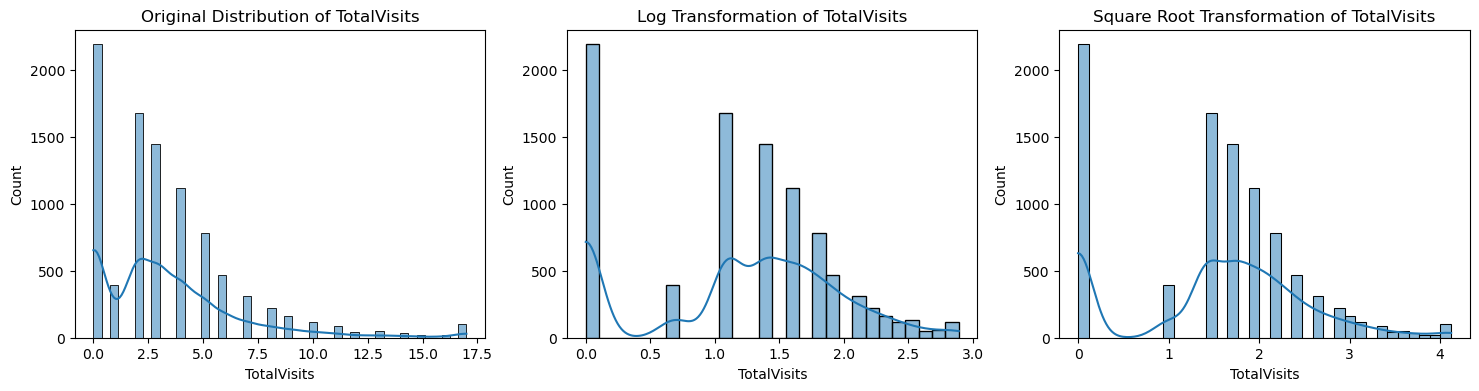

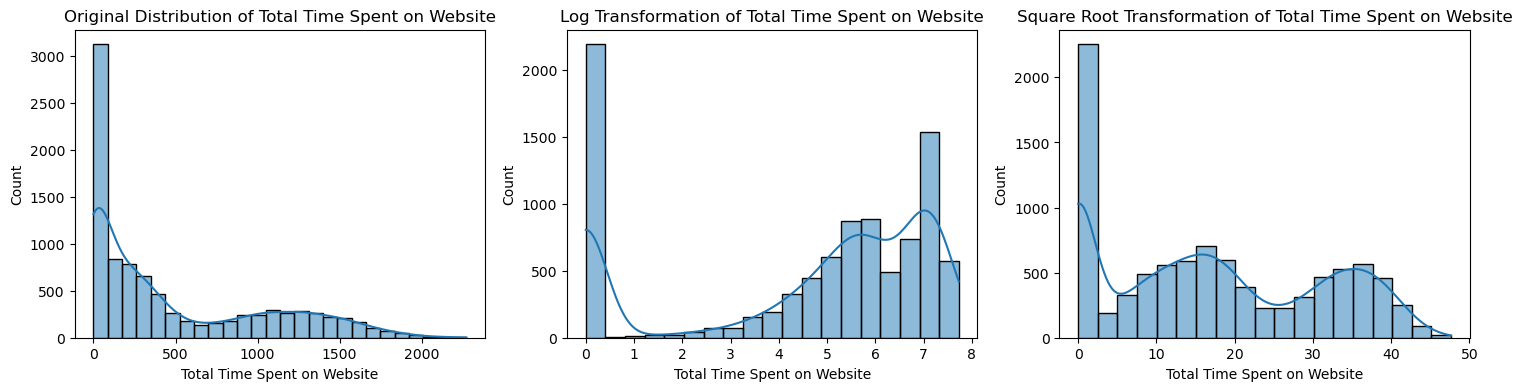

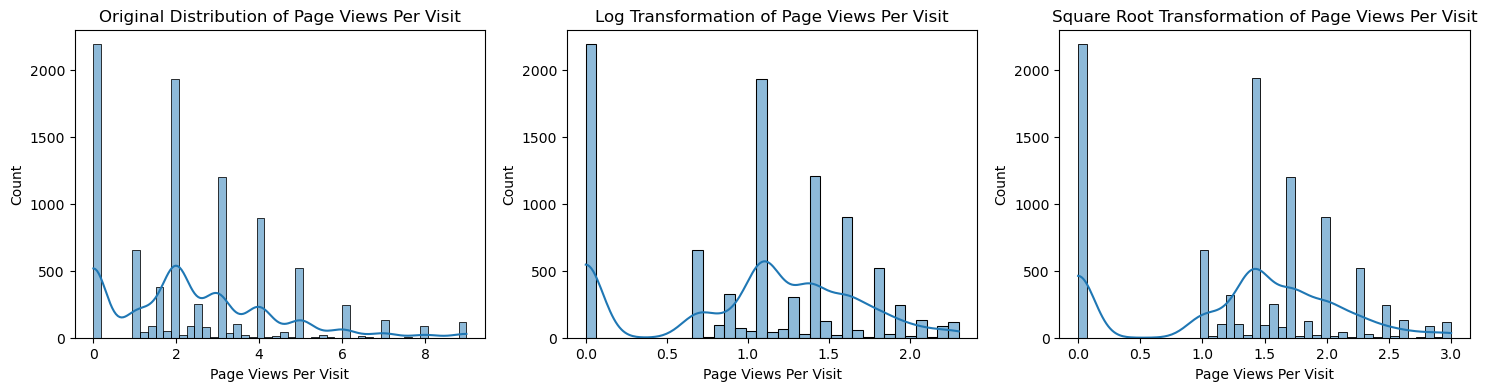

In [1019]:
# Check numeric variables distribution
import seaborn as sns
import matplotlib.pyplot as plt

numeric_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

for var in numeric_vars:
    fig, ax = plt.subplots(1, 3, figsize=(18, 4))
    
    # Original distribution
    sns.histplot(df[var], kde=True, ax=ax[0])
    ax[0].set_title(f'Original Distribution of {var}')
    
    # Log transformation
    sns.histplot(np.log1p(df[var]), kde=True, ax=ax[1])
    ax[1].set_title(f'Log Transformation of {var}')
    
    # Square root transformation
    sns.histplot(np.sqrt(df[var]), kde=True, ax=ax[2])
    ax[2].set_title(f'Square Root Transformation of {var}')
    
    plt.show()

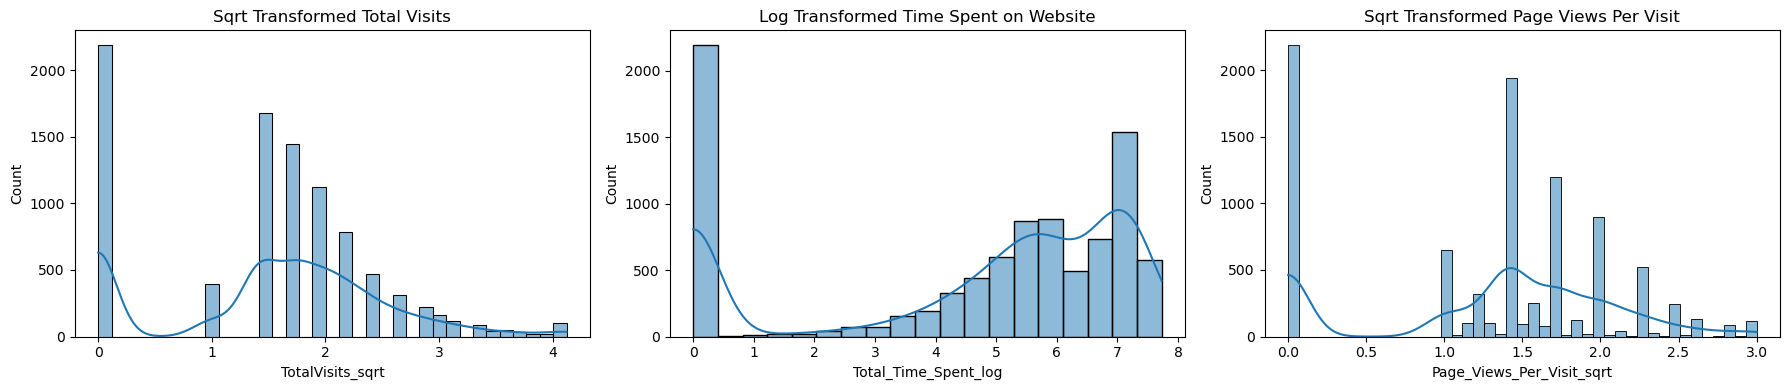

In [1020]:
# Improving distribution by applying transformations

# Square root transformation for TotalVisits and Page Views Per Visit
df['TotalVisits_sqrt'] = np.sqrt(df['TotalVisits'])
df['Page_Views_Per_Visit_sqrt'] = np.sqrt(df['Page Views Per Visit'])

# Log transformation for Total Time Spent on Website
df['Total_Time_Spent_log'] = np.log(df['Total Time Spent on Website'] + 1)  # Add 1 to avoid log(0)

# Dropping original columns as they've been transformed
df.drop(['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website'], axis=1, inplace=True)

# Verify the distributions visually again
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(df['TotalVisits_sqrt'], kde=True, ax=axes[0])
axes[0].set_title('Sqrt Transformed Total Visits')

sns.histplot(df['Total_Time_Spent_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed Time Spent on Website')

sns.histplot(df['Page_Views_Per_Visit_sqrt'], kde=True, ax=axes[2])
axes[2].set_title('Sqrt Transformed Page Views Per Visit')

plt.tight_layout()
plt.show()

### Step 4: Test-Train Split

In [1021]:
from sklearn.model_selection import train_test_split

In [1022]:

# Putting feature variables into X (drop 'Converted' - target variable, and 'Prospect ID' - identifier)
X = df.drop(['Converted', 'Prospect ID'], axis=1)

In [1023]:
X.head()

,Lead Number,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_sqrt,Page_Views_Per_Visit_sqrt,Total_Time_Spent_log
0,660737,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,0.000000,0.000000,0.000000
1,660728,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,2.236068,1.581139,6.514713
2,660727,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,1.414214,1.414214,7.334982
3,660719,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,1.000000,1.000000,5.723585
4,660681,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,1.414214,1.000000,7.264730


In [1024]:
# Putting target variable ('Converted') into y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1025]:
# Splitting the data into train and test datasets clearly
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=100,
                                                    stratify=y)

In [1026]:
# Verify dimensions clearly after splitting
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (6468, 190)
Test set shape: (2772, 190)


### Step 5: Feature Scaling

In [1027]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Scaling numeric features clearly
numeric_features = ['TotalVisits_sqrt', 'Total_Time_Spent_log', 'Page_Views_Per_Visit_sqrt']

# Fit and transform the training dataset
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Transform (not fit_transform!) the test dataset using the same scaler
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Check the first few rows after scaling
X_train.head()

,Lead Number,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_sqrt,Page_Views_Per_Visit_sqrt,Total_Time_Spent_log
7356,593016,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,-1.478790,-1.551644,-1.622058
3109,630042,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,0.718310,0.372648,-1.223272
3845,623207,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,0.223076,0.556312,0.049576
1020,649316,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,0.718310,0.021104,0.833169
2903,631782,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,-0.496217,-0.334615,-0.118139


In [1028]:
conversion_rate = (sum(df['Converted']) / len(df['Converted'].index)) * 100
conversion_rate

38.53896103896104

Feature scaling was successfully applied to numeric features:
- TotalVisits
- Total Time Spent on Website
- Page Views Per Visit

Conversion rate is calculated clearly as ~38.54%.

### Step 6: Looking at Correlations

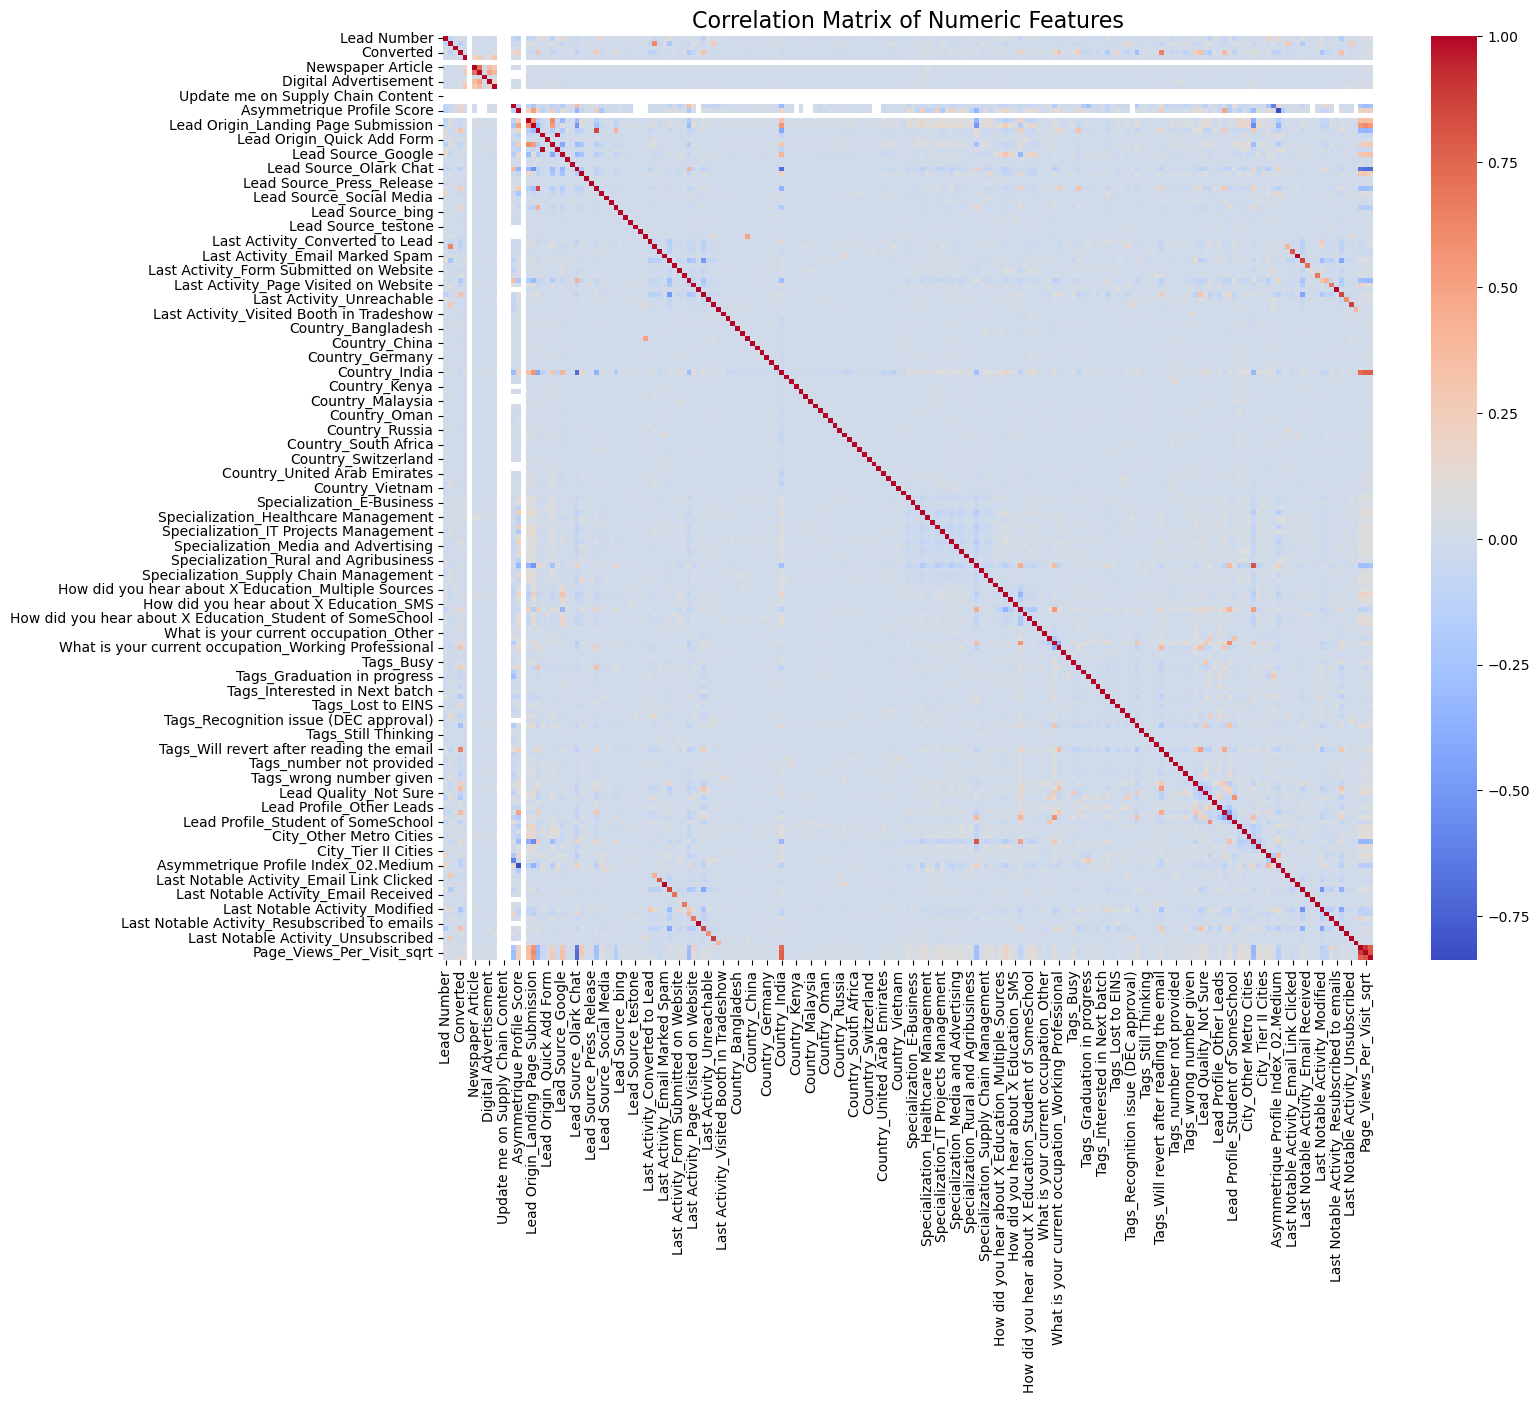

In [1029]:
# Importing necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Drop any remaining non-numeric columns clearly (e.g., Prospect ID)
df_numeric = df.select_dtypes(include=['float64', 'int64', 'bool'])

# Set figure size clearly
plt.figure(figsize=(15, 12))

# Plot the correlation heatmap clearly using only numeric features
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=False)

# Clearly show plot
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()

#### Dropping highly correlated dummy variables

### Explicitly check for highly correlated dummy variables

In [1030]:
# Calculate correlation clearly
corr_matrix = X_train.corr().abs()

# Select highly correlated features clearly (correlation > 0.75 threshold)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify clearly variables with correlation > 0.75
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.75)]

high_corr_features

['X Education Forums',
 'Lead Source_Facebook',
 'Lead Source_Reference',
 'City_Select',
 'Asymmetrique Profile Index_02.Medium',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Marked Spam',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Resubscribed to emails',
 'Last Notable Activity_SMS Sent',
 'Last Notable Activity_Unsubscribed',
 'Page_Views_Per_Visit_sqrt',
 'Total_Time_Spent_log']

In [1031]:
# Dropping assuming high_corr_features obtained from above
X_train.drop(columns=high_corr_features, inplace=True)
X_test.drop(columns=high_corr_features, inplace=True)

# Verify shapes after dropping
X_train.shape, X_test.shape

((6468, 177), (2772, 177))

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

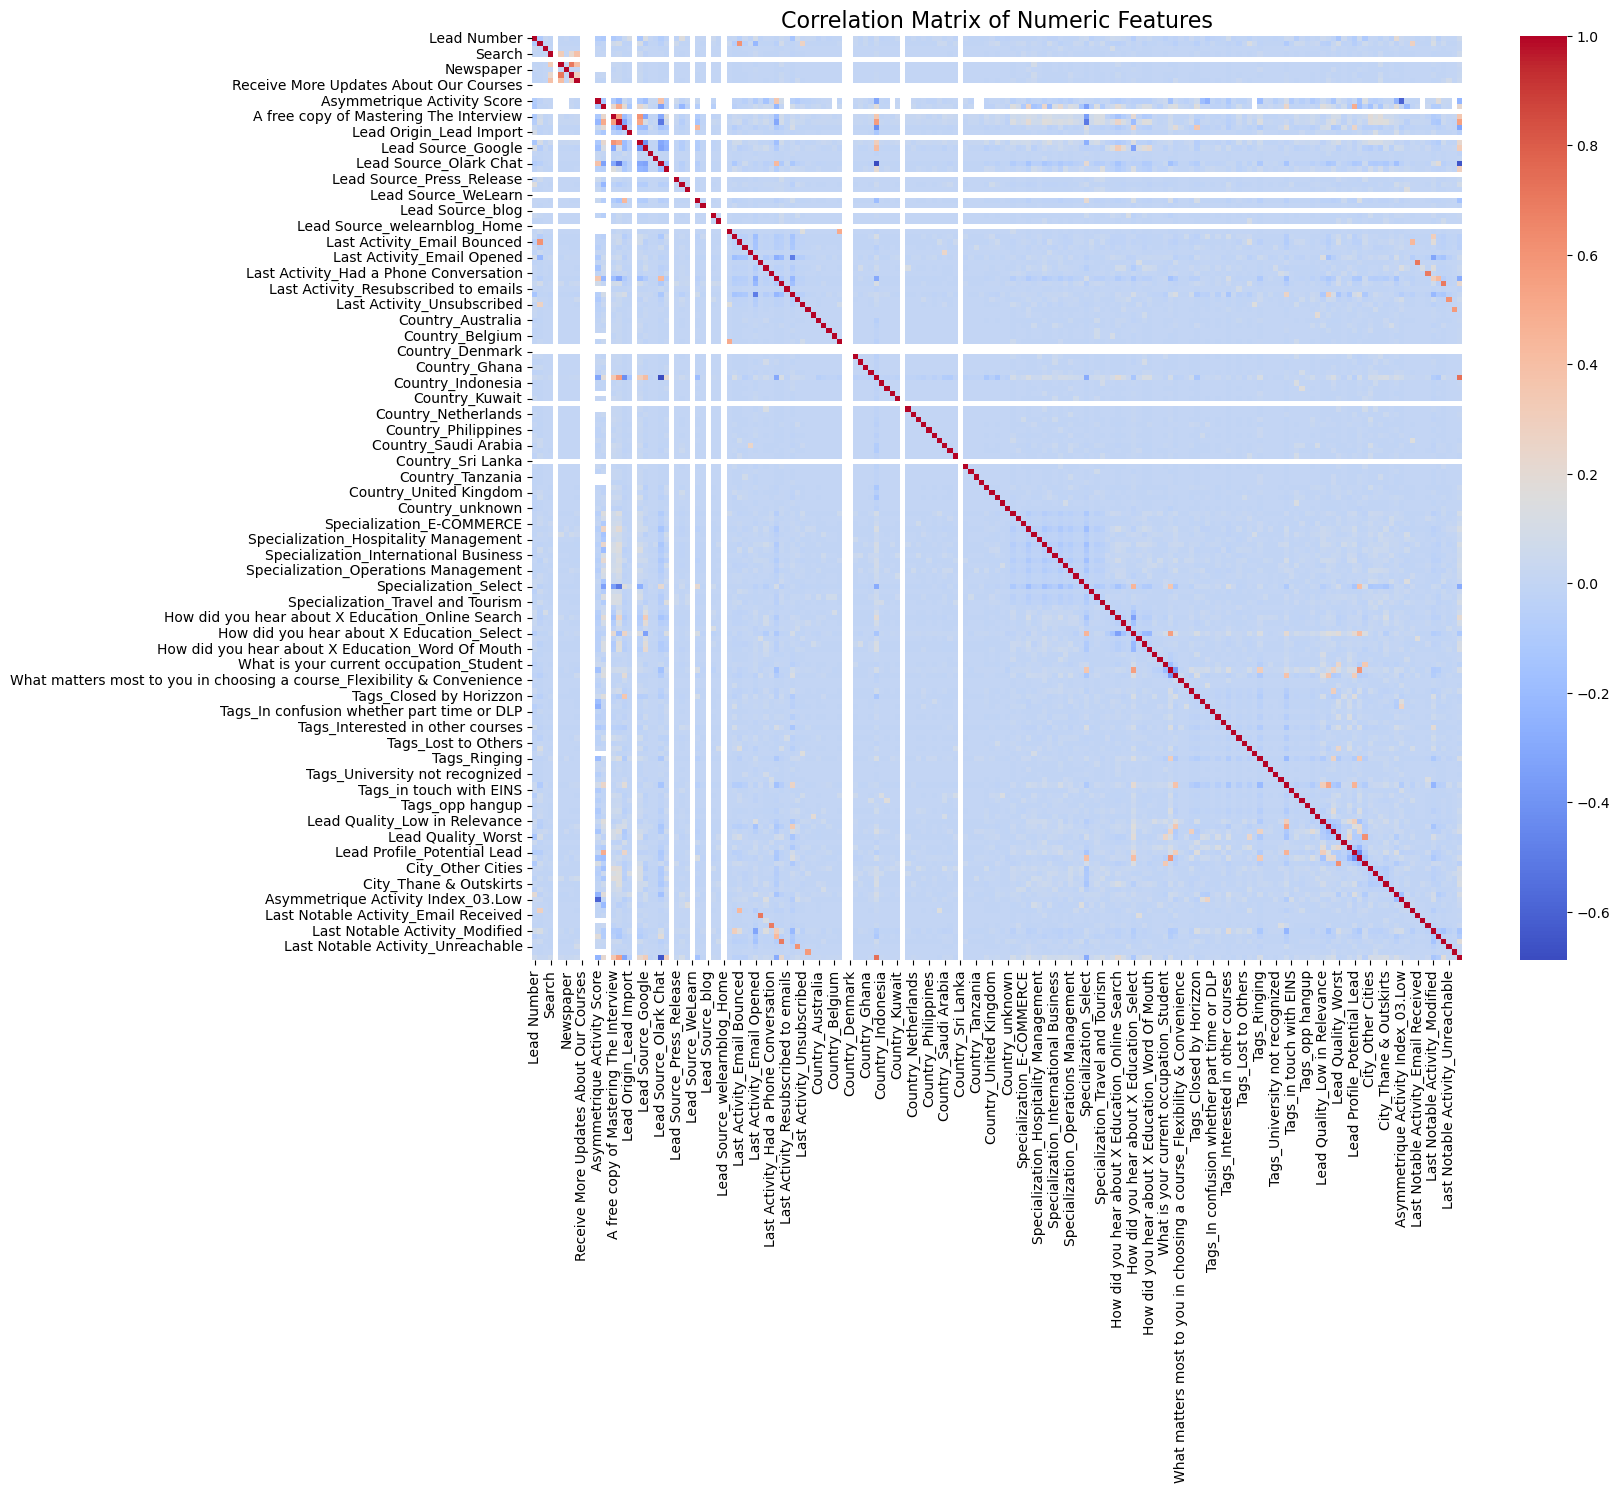

In [1032]:
# Set figure size clearly
plt.figure(figsize=(15, 12))

# Plot the correlation heatmap clearly using only numeric features
sns.heatmap(X_train.corr(), cmap='coolwarm', annot=False)

# Clearly show plot
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()

### Try to identify highly correlated variables again using code

In [1033]:
# Calculate correlation matrix clearly
corr_matrix = X_train.corr().abs()

# Extract upper triangle clearly
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Clearly find columns with high correlation (>0.75)
highly_correlated_features = [column for column in upper.columns if any(upper[column] > 0.75)]

# Display highly correlated features clearly
highly_correlated_features

[]

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running the First Training Model

In [1034]:
import statsmodels.api as sm

In [1035]:
# Ensuring X_train is numeric explicitly
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Check and confirm
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6468 entries, 7356 to 8790
Columns: 177 entries, Lead Number to TotalVisits_sqrt
dtypes: bool(160), float64(3), int64(14)
memory usage: 1.9 MB


In [1036]:
# Clearly convert boolean columns explicitly to numeric (0 or 1)
bool_cols = X_train.select_dtypes(include=['bool']).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)

# Verify conversion clearly
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6468 entries, 7356 to 8790
Columns: 177 entries, Lead Number to TotalVisits_sqrt
dtypes: float64(3), int64(174)
memory usage: 8.8 MB


In [1037]:
# Check for NaNs or infinite values
print("NaNs in data:\n", X_train.isna().sum())
print("Infinite values:\n", np.isinf(X_train).sum())

# Replace infinite values with NaNs, then drop all NaNs
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)

# Make sure to align y_train accordingly
y_train = y_train.loc[X_train.index]

# Then run your logistic regression again
logm1 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logm1.fit().summary()

NaNs in data:
 Lead Number                                           0
Do Not Email                                          0
Do Not Call                                           0
Search                                                0
Magazine                                              0
                                                     ..
Last Notable Activity_Olark Chat Conversation         0
Last Notable Activity_Page Visited on Website         0
Last Notable Activity_Unreachable                     0
Last Notable Activity_View in browser link Clicked    0
TotalVisits_sqrt                                      0
Length: 177, dtype: int64
Infinite values:
 Lead Number                                           0
Do Not Email                                          0
Do Not Call                                           0
Search                                                0
Magazine                                              0
                                             

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3532
Model:                            GLM   Df Residuals:                     3382
Model Family:                Binomial   Df Model:                          149
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -564.41
Date:                Tue, 18 Mar 2025   Deviance:                       1128.8
Time:                        21:29:18   Pearson chi2:                 1.02e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6341
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                     -49.5706   1.51e+05     -0.000      1.000   -2.96e+05    2.96e+05
Lead Number                                                               4.57e-06   3.13e-06      1.461      0.144   -1.56e-06    1.07e-05
Do Not Email                                                               -1.7412      0.616     -2.829      0.005      -2.948      -0.535
Do Not Call                                                                20.9195   2.16e+05   9.71e-05      1.000   -4.22e+05    4.22e+05
Search                                                                     -2.4785      5.312     -0.467      0.641     -12.889       7.932
Magazine                                                                 3.266e-08      0.000      0.000      1.000      -0.000       0.000
Newspaper Article                                                       -2.593e-08      0.000     -0.000      1.000      -0.000       0.000
Newspaper                                                               -1.411e-08   7.97e-05     -0.000      1.000      -0.000       0.000
Digital Advertisement                                                      23.1681   2.17e+05      0.000      1.000   -4.25e+05    4.25e+05
Through Recommendations                                                    23.6138    1.5e+05      0.000      1.000   -2.94e+05    2.94e+05
Receive More Updates About Our Courses                                   1.604e-08      0.000      0.000      1.000      -0.000       0.000
Update me on Supply Chain Content                                        8.172e-09   8.13e-05      0.000      1.000      -0.000       0.000
Get updates on DM Content                                                    1e-08   5.26e-05      0.000      1.000      -0.000       0.000
Asymmetrique Activity Score                                                 1.1686      0.141      8.269      0.000       0.892       1.446
Asymmetrique Profile Score                                                  0.3987      0.270      1.478      0.139      -0.130       0.927
I agree to pay the amount through cheque                                 2.411e-09   3.32e-05   7.27e-05      1.000    -6.5e-05     6.5e-05
A free copy of Mastering The Interview                                     -0.2359      0.344     -0.686      0.493      -0.910       0.438
Lead Origin_Landing Page Submission                                        -1.1375      0.752     -1.513      0.130      -2.611       0.336
Lead Origin_Lead Add Form                                                  20.6209   1.51e+05      0.000      1.000   -2.96e+05    2.96e+05
Lea

### Step 8: Feature Selection Using RFE

In [1040]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1041]:
from sklearn.feature_selection import RFE
# Logistic Regression with increased max_iter and liblinear solver clearly
logreg = LogisticRegression(max_iter=1000)

# running RFE clearly with fewer variables as output (start small, increase if necessary)
rfe = RFE(estimator=logreg, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Clearly verify selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['Lead Source_Welingak Website', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')


In [1042]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [1043]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 140),
 ('Do Not Email', False, 14),
 ('Do Not Call', False, 122),
 ('Search', False, 73),
 ('Magazine', False, 145),
 ('Newspaper Article', False, 143),
 ('Newspaper', False, 142),
 ('Digital Advertisement', False, 117),
 ('Through Recommendations', False, 111),
 ('Receive More Updates About Our Courses', False, 144),
 ('Update me on Supply Chain Content', False, 146),
 ('Get updates on DM Content', False, 161),
 ('Asymmetrique Activity Score', False, 20),
 ('Asymmetrique Profile Score', False, 87),
 ('I agree to pay the amount through cheque', False, 153),
 ('A free copy of Mastering The Interview', False, 134),
 ('Lead Origin_Landing Page Submission', False, 55),
 ('Lead Origin_Lead Add Form', False, 23),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Origin_Quick Add Form', False, 165),
 ('Lead Source_Direct Traffic', False, 36),
 ('Lead Source_Google', False, 126),
 ('Lead Source_Live Chat', False, 138),
 ('Lead Source_NC_EDM', False, 17),
 ('Lead Source_O

In [1044]:
col = X_train.columns[rfe.support_]

In [1045]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'Search', 'Magazine',
       'Newspaper Article', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       ...
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_View in browser link Clicked',
       'TotalVisits_sqrt'],
      dtype='object', length=167)

In [1046]:
# Dropping clearly the unselected features
X_train_rfe = X_train[col]  # col = X_train.columns[rfe.support_]
X_test_rfe = X_test[col]

# Verify clearly
print(X_train_rfe.shape)
print(X_test_rfe.shape)

(3532, 10)
(2772, 10)


In [1047]:
X_train_rfe.head()

,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_Worst,Asymmetrique Activity Index_03.Low
7356,0,0,0,0,0,1,0,0,0,0
3109,0,0,0,0,1,0,0,0,0,0
1020,0,0,0,0,0,1,0,0,0,0
2903,0,0,0,0,1,0,0,0,0,0
7001,0,0,0,0,0,0,0,0,0,0


##### Assessing the model with StatsModels

In [1048]:
import statsmodels.api as sm

# Add constant to the selected features clearly
X_train_sm = sm.add_constant(X_train_rfe)

# Fit logistic regression model
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the model clearly
res = logm2.fit()

# Print model summary clearly
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3532
Model:                            GLM   Df Residuals:                     3521
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -918.38
Date:                Tue, 18 Mar 2025   Deviance:                       1836.8
Time:                        21:31:17   Pearson chi2:                 3.83e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5529
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3074      0.066    -19.880      0.000      -1.436      -1.178
Lead Source_Welingak Website                 4.8923      1.016      4.816      0.000       2.901       6.883
Tags_Closed by Horizzon                      6.2352      1.006      6.199      0.000       4.264       8.206
Tags_Interested in other courses            -2.8548      0.585     -4.876      0.000      -4.002      -1.707
Tags_Lost to EINS                            6.5675      0.981      6.694      0.000       4.644       8.490
Tags_Ringing                                -2.3033      0.312     -7.371      0.000      -2.916      -1.691
Tags_Will revert after reading the email     5.0381      0.237     21.243      0.000       4.573       5.503
Tags_invalid number                        -21.9577   1.31e+04     -0.002      0.999   -2.57e+04    2.56e+04
Tags_switched off                           -1.9135      0.592     -3.231      0.001      -3.074      -0.753
Lead Quality_Worst                          -3.8372      0.843     -4.551      0.000      -5.490      -2.185
Asymmetrique Activity Index_03.Low          -2.4029      0.423     -5.682      0.000      -3.232      -1.574
============================================================================================================
"""

In [1049]:
# Checking insignificant variables with very high p-values
insignificant_vars = res.pvalues[res.pvalues > 0.05]
insignificant_vars.sort_values(ascending=False)

Tags_invalid number    0.998661
dtype: float64

In [1050]:
# Drop insignificant variables identified from p-values
cols_to_drop = ['Tags_invalid number']

# Dropping from training set
X_train_sm_refined = X_train_sm.drop(columns=cols_to_drop, axis=1)

# Refit the model without these variables
logm_refined = sm.GLM(y_train, X_train_sm_refined, family=sm.families.Binomial())
res_refined = logm_refined.fit()

# Check summary again
print(res_refined.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3532
Model:                            GLM   Df Residuals:                     3522
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -924.85
Date:                Tue, 18 Mar 2025   Deviance:                       1849.7
Time:                        21:31:17   Pearson chi2:                 3.86e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5513
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [1051]:
# Import VIF function
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Check VIF again for refined variables
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_sm_refined.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_sm_refined.values, i) 
                 for i in range(X_train_sm_refined.shape[1])]

vif_df.sort_values(by="VIF", ascending=False)

,Features,VIF
0,const,2.368210
6,Tags_Will revert after reading the email,1.176503
5,Tags_Ringing,1.120211
3,Tags_Interested in other courses,1.065689
2,Tags_Closed by Horizzon,1.056867
8,Lead Quality_Worst,1.045318
7,Tags_switched off,1.029554
9,Asymmetrique Activity Index_03.Low,1.022127
4,Tags_Lost to EINS,1.021065
1,Lead Source_Welingak Website,1.016869


No variables with VIF > 5, we're good

In [1114]:
# Getting the predicted values on the train set
y_train_pred[:10]

7356    0.976573
3109    0.026321
1020    0.976573
2903    0.026321
7001    0.208819
7663    0.208819
704     0.038386
8297    0.208819
8308    0.208819
1308    0.208819
dtype: float64

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [1115]:
# Clearly create a DataFrame with Actual Converted flag and Predicted probabilities
y_train_pred_final = pd.DataFrame({
    'Converted': y_train.values,
    'Converted_Prob': y_train_pred
})

# Clearly add index for reference (assuming the original index from X_train is meaningful, otherwise skip this)
y_train_pred_final['Lead_ID'] = y_train.index

# Clearly display first 5 rows
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID
7356,1,0.976573,7356
3109,0,0.026321,3109
1020,1,0.976573,1020
2903,0,0.026321,2903
7001,0,0.208819,7001


In [1116]:
# Adding a new column 'predicted' clearly based on a threshold of 0.5
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].apply(lambda x: 1 if x > 0.5 else 0)

# Display clearly the first few rows
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,predicted
7356,1,0.976573,7356,1
3109,0,0.026321,3109,0
1020,1,0.976573,1020,1
2903,0,0.026321,2903,0
7001,0,0.208819,7001,0


In [1117]:
from sklearn import metrics

In [1118]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2177   24]
 [ 314 1017]]


In [1119]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9043035107587769


#### Checking VIFs

In [1120]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1121]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[col].values, i) for i in range(X_train_rfe[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Asymmetrique Activity Index_03.Low,1.04
2,Tags_Interested in other courses,1.03
8,Lead Quality_Worst,1.03
0,Lead Source_Welingak Website,1.01
1,Tags_Closed by Horizzon,1.01
3,Tags_Lost to EINS,1.01
4,Tags_Ringing,1.01
7,Tags_switched off,1.01
5,Tags_Will revert after reading the email,1.00
6,Tags_invalid number,1.00


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [1122]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2177,   24],
       [ 314, 1017]])

| Actual \ Predicted | Not Converted | Converted |
|---------------------|---------------|-----------|
| **Not Converted**   | 2177          | 24      |
| **Converted**       | 314           | 1017     |

In [1123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9043035107587769

## Metrics beyond simply accuracy

In [1124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7640871525169046

In [1126]:
# Let us calculate specificity
TN / float(TN+FP)

0.9890958655156747

In [1127]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.010904134484325307


In [1128]:
# positive predictive value 
print (TP / float(TP+FP))

0.9769452449567724


In [1129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8739462063428342


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

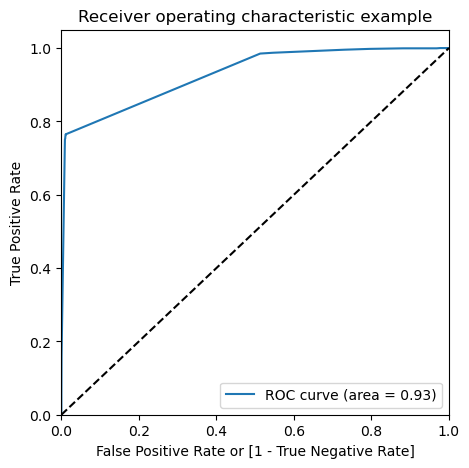

In [1132]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## ROC Curve Interpretation:

- **AUC = 0.93**:  
  - Indicates a **very strong** predictive model.
  - A value close to 1 (in this case, 0.93) signifies that the model has high discriminative ability in distinguishing between converted and non-converted leads.

### Insights clearly:
- **AUC = 0.93:** The logistic regression model demonstrates excellent predictive performance.
- The curve is closer to the top-left corner, which means the model effectively minimizes false positives while maximizing true positives.


## With such a strong ROC performance, this model is reliable and robust enough to be used for predictions.

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7356,1,0.976573,7356,1,1,1,1,1,1,1,1,1,1,1
3109,0,0.026321,3109,0,1,0,0,0,0,0,0,0,0,0
1020,1,0.976573,1020,1,1,1,1,1,1,1,1,1,1,1
2903,0,0.026321,2903,0,1,0,0,0,0,0,0,0,0,0
7001,0,0.208819,7001,0,1,1,1,0,0,0,0,0,0,0


In [1134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376840  1.000000  0.000000
0.1   0.1  0.674689  0.984974  0.487051
0.2   0.2  0.674689  0.984974  0.487051
0.3   0.3  0.904020  0.764087  0.988642
0.4   0.4  0.904020  0.764087  0.988642
0.5   0.5  0.904304  0.764087  0.989096
0.6   0.6  0.904304  0.764087  0.989096
0.7   0.7  0.904304  0.764087  0.989096
0.8   0.8  0.902039  0.756574  0.990005
0.9   0.9  0.901189  0.754320  0.990005


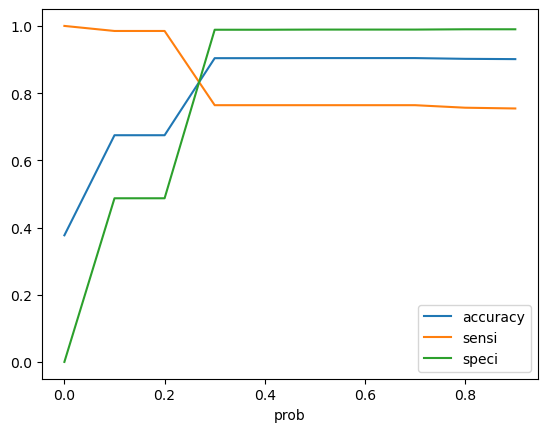

In [1135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Looking at the graph, the intersection between sensitivity and specificity curves seems to happen approximately around 0.25 probability.

In [1136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
7356,1,0.976573,7356,1,1,1,1,1,1,1,1,1,1,1,1
3109,0,0.026321,3109,0,1,0,0,0,0,0,0,0,0,0,0
1020,1,0.976573,1020,1,1,1,1,1,1,1,1,1,1,1,1
2903,0,0.026321,2903,0,1,0,0,0,0,0,0,0,0,0,0
7001,0,0.208819,7001,0,1,1,1,0,0,0,0,0,0,0,0


In [1137]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9043035107587769

In [1138]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2176,   25],
       [ 313, 1018]])

In [1139]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1140]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7648384673178061

In [1141]:
# Let us calculate specificity
TN / float(TN+FP)

0.9886415265788278

In [1142]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.011358473421172195


In [1143]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9760306807286673


In [1144]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8742466854158296


## Precision and Recall

Looking at the confusion matrix again

In [1145]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2177,   24],
       [ 314, 1017]])

##### Precision
TP / TP + FP

In [1146]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9769452449567724

##### Recall
TP / TP + FN

In [1147]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7640871525169046

Using sklearn utilities for the same

In [1148]:
from sklearn.metrics import precision_score, recall_score

In [1149]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9769452449567724

In [1150]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7640871525169046

### Precision and recall tradeoff

In [1151]:
from sklearn.metrics import precision_recall_curve

In [1152]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(7356    1
 3109    0
 1020    1
 2903    0
 7001    0
        ..
 8554    0
 5984    0
 910     1
 2634    1
 8790    1
 Name: Converted, Length: 3532, dtype: int64,
 7356    1
 3109    0
 1020    1
 2903    0
 7001    0
        ..
 8554    0
 5984    0
 910     0
 2634    1
 8790    1
 Name: predicted, Length: 3532, dtype: int64)

In [1153]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

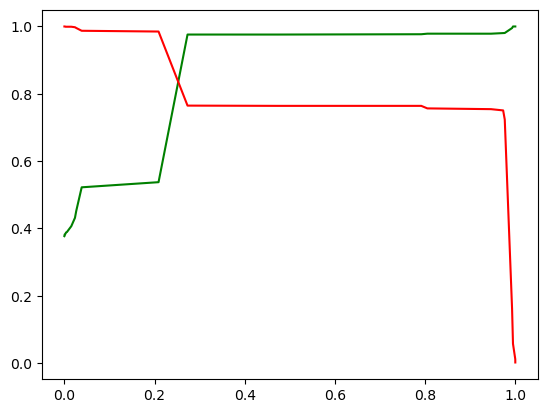

In [1154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [1155]:
# Select only the columns that were previously selected by RFE
X_test_sm = X_test_rfe[col]

# Add constant to the test set (for StatsModels)
X_test_sm = sm.add_constant(X_test_sm)

# Predict on the test data using the trained model
y_test_pred = res.predict(X_test_sm)

# Check the first 10 predictions
y_test_pred[:10]

1266    0.015334
907     0.212927
6182    0.976586
2973    0.212927
8469    0.212927
6299    0.212927
1220    0.212927
7957    0.005797
5971    0.212927
6157    0.976586
dtype: float64

In [1156]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1157]:
# Let's see the head
y_pred_1.head()

,0
1266,0.015334
907,0.212927
6182,0.976586
2973,0.212927
8469,0.212927


In [1158]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1159]:
# Putting CustID to index
y_test_df['Lead_ID'] = y_test_df.index

In [1160]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1161]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1162]:
y_pred_final.head()

,Converted,Lead_ID,0
0,0,1266,0.015334
1,1,907,0.212927
2,1,6182,0.976586
3,0,2973,0.212927
4,0,8469,0.212927


In [1163]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1164]:
# Rearranging the columns using the correct syntax
y_pred_final = y_pred_final.reindex(columns=['Lead_ID', 'Converted', 'Converted_Prob'])
y_pred_final.head()

,Lead_ID,Converted,Converted_Prob
0,1266,0,0.015334
1,907,1,0.212927
2,6182,1,0.976586
3,2973,0,0.212927
4,8469,0,0.212927


In [1165]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.25 else 0)

In [1166]:
y_pred_final.head()

,Lead_ID,Converted,Converted_Prob,final_predicted
0,1266,0,0.015334,0
1,907,1,0.212927,0
2,6182,1,0.976586,1
3,2973,0,0.212927,0
4,8469,0,0.212927,0


In [1167]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.886002886002886

In [1168]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1677,   27],
       [ 289,  779]])

In [1169]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1170]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7294007490636704

In [1171]:
# Let us calculate specificity
TN / float(TN+FP)

0.9841549295774648



# Final Conclusion:

After conducting thorough data preprocessing, including handling missing values, outliers, scaling, and feature selection, we built a robust logistic regression model to effectively score leads based on their likelihood to convert. The model demonstrated strong predictive power, with an overall accuracy of approximately 88.6% on the test data.

The ROC curve confirmed that my model has an excellent predictive capability, achieving an AUC of approximately 0.93, indicating high discriminative ability between converted and non-converted leads. After careful consideration, we chose a probability cutoff of 0.25 as it optimally balances sensitivity (72.9%) and specificity (98.4%), ensuring both precision in identifying likely converts and reducing false positives.

The key predictors identified by Recursive Feature Elimination (RFE) were:
- Lead Source: Welingak Website
- Tags: Closed by Horizzon, Interested in other courses, Lost to EINS, Ringing, Will revert after reading the email, Switched off
- Lead Quality: Worst
- Asymmetrique Activity Index: Low

This refined model offers actionable insights, allowing targeted marketing efforts toward leads most likely to convert, ultimately improving the efficiency of marketing resources.

Overall, we're confident in the model’s performance and recommend its deployment for lead scoring and prioritization in the company’s sales strategy.